## **Retrieve dataset as a DataFrame**

In [ ]:
from download_dataset import dataset
import pandas as pd

d = dataset()
df = d.get_dataframe()

print(df.head())  # Display the first few rows of the DataFrame


## **EDA Round 1 - Distributions**

##### Tools: Data Wrangler, Seaborne, Matplotlib

##### **save dataset to CSV, create DataFrames for each type of class**

In [ ]:
df.to_csv('cover_type.csv', index=False)  # Save dataset as a CSV to use Data Wrangler


Unique class names: [5 2 1 7 3 6 4]


### Sunlight-related Feature Distributions

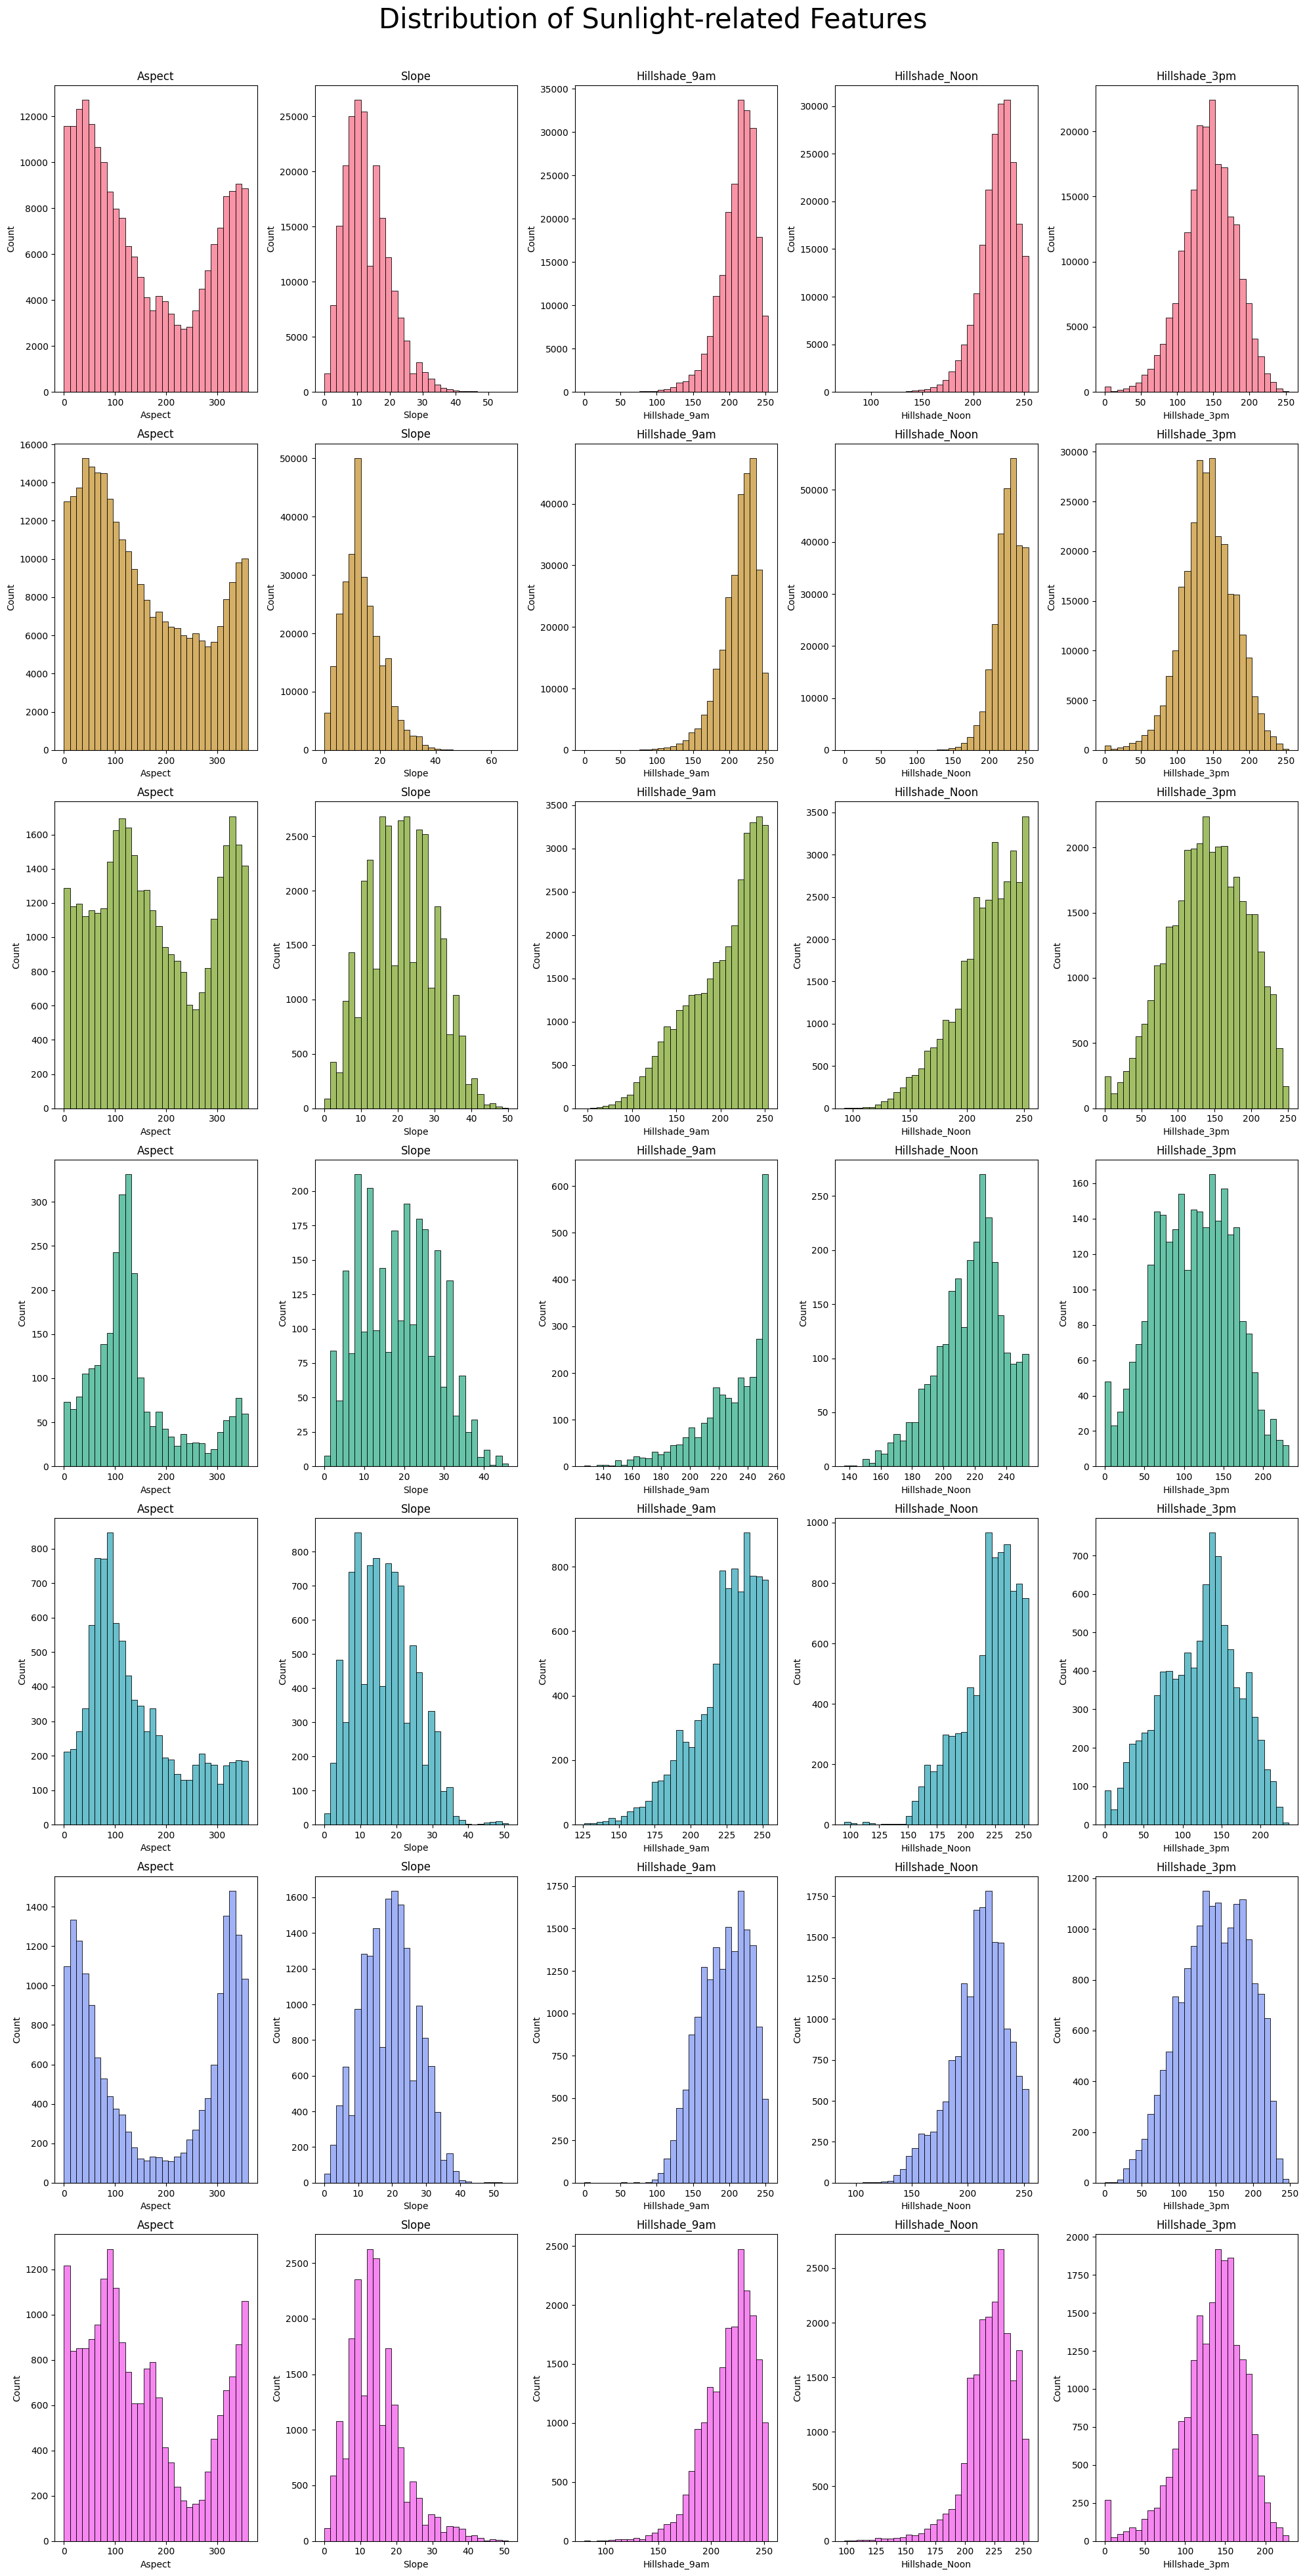

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for numerical features
fig, axes = plt.subplots(7, 5, figsize=(20, 40))
fig.suptitle('Distribution of Sunlight-related Features', fontsize=30)
colors = sns.color_palette("husl", 7)  # Generate 7 distinct colors

# List of numerical features
sunlight = ['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

# Create histograms for each feature
for type in range(7): # for each class type

        for i, feature in enumerate(sunlight):
                
                row = type
                col = i
                
                sns.histplot(data=df[df['Cover_Type'] == type+1], x=feature, bins=30
                                , ax=axes[type, col], color=colors[type])
                axes[row, col].set_title(f'{feature}')

plt.tight_layout() # plots won't overlap
plt.subplots_adjust(top=0.95)  # make room for suptitle
plt.show()


### Distance-related Feature Distributions

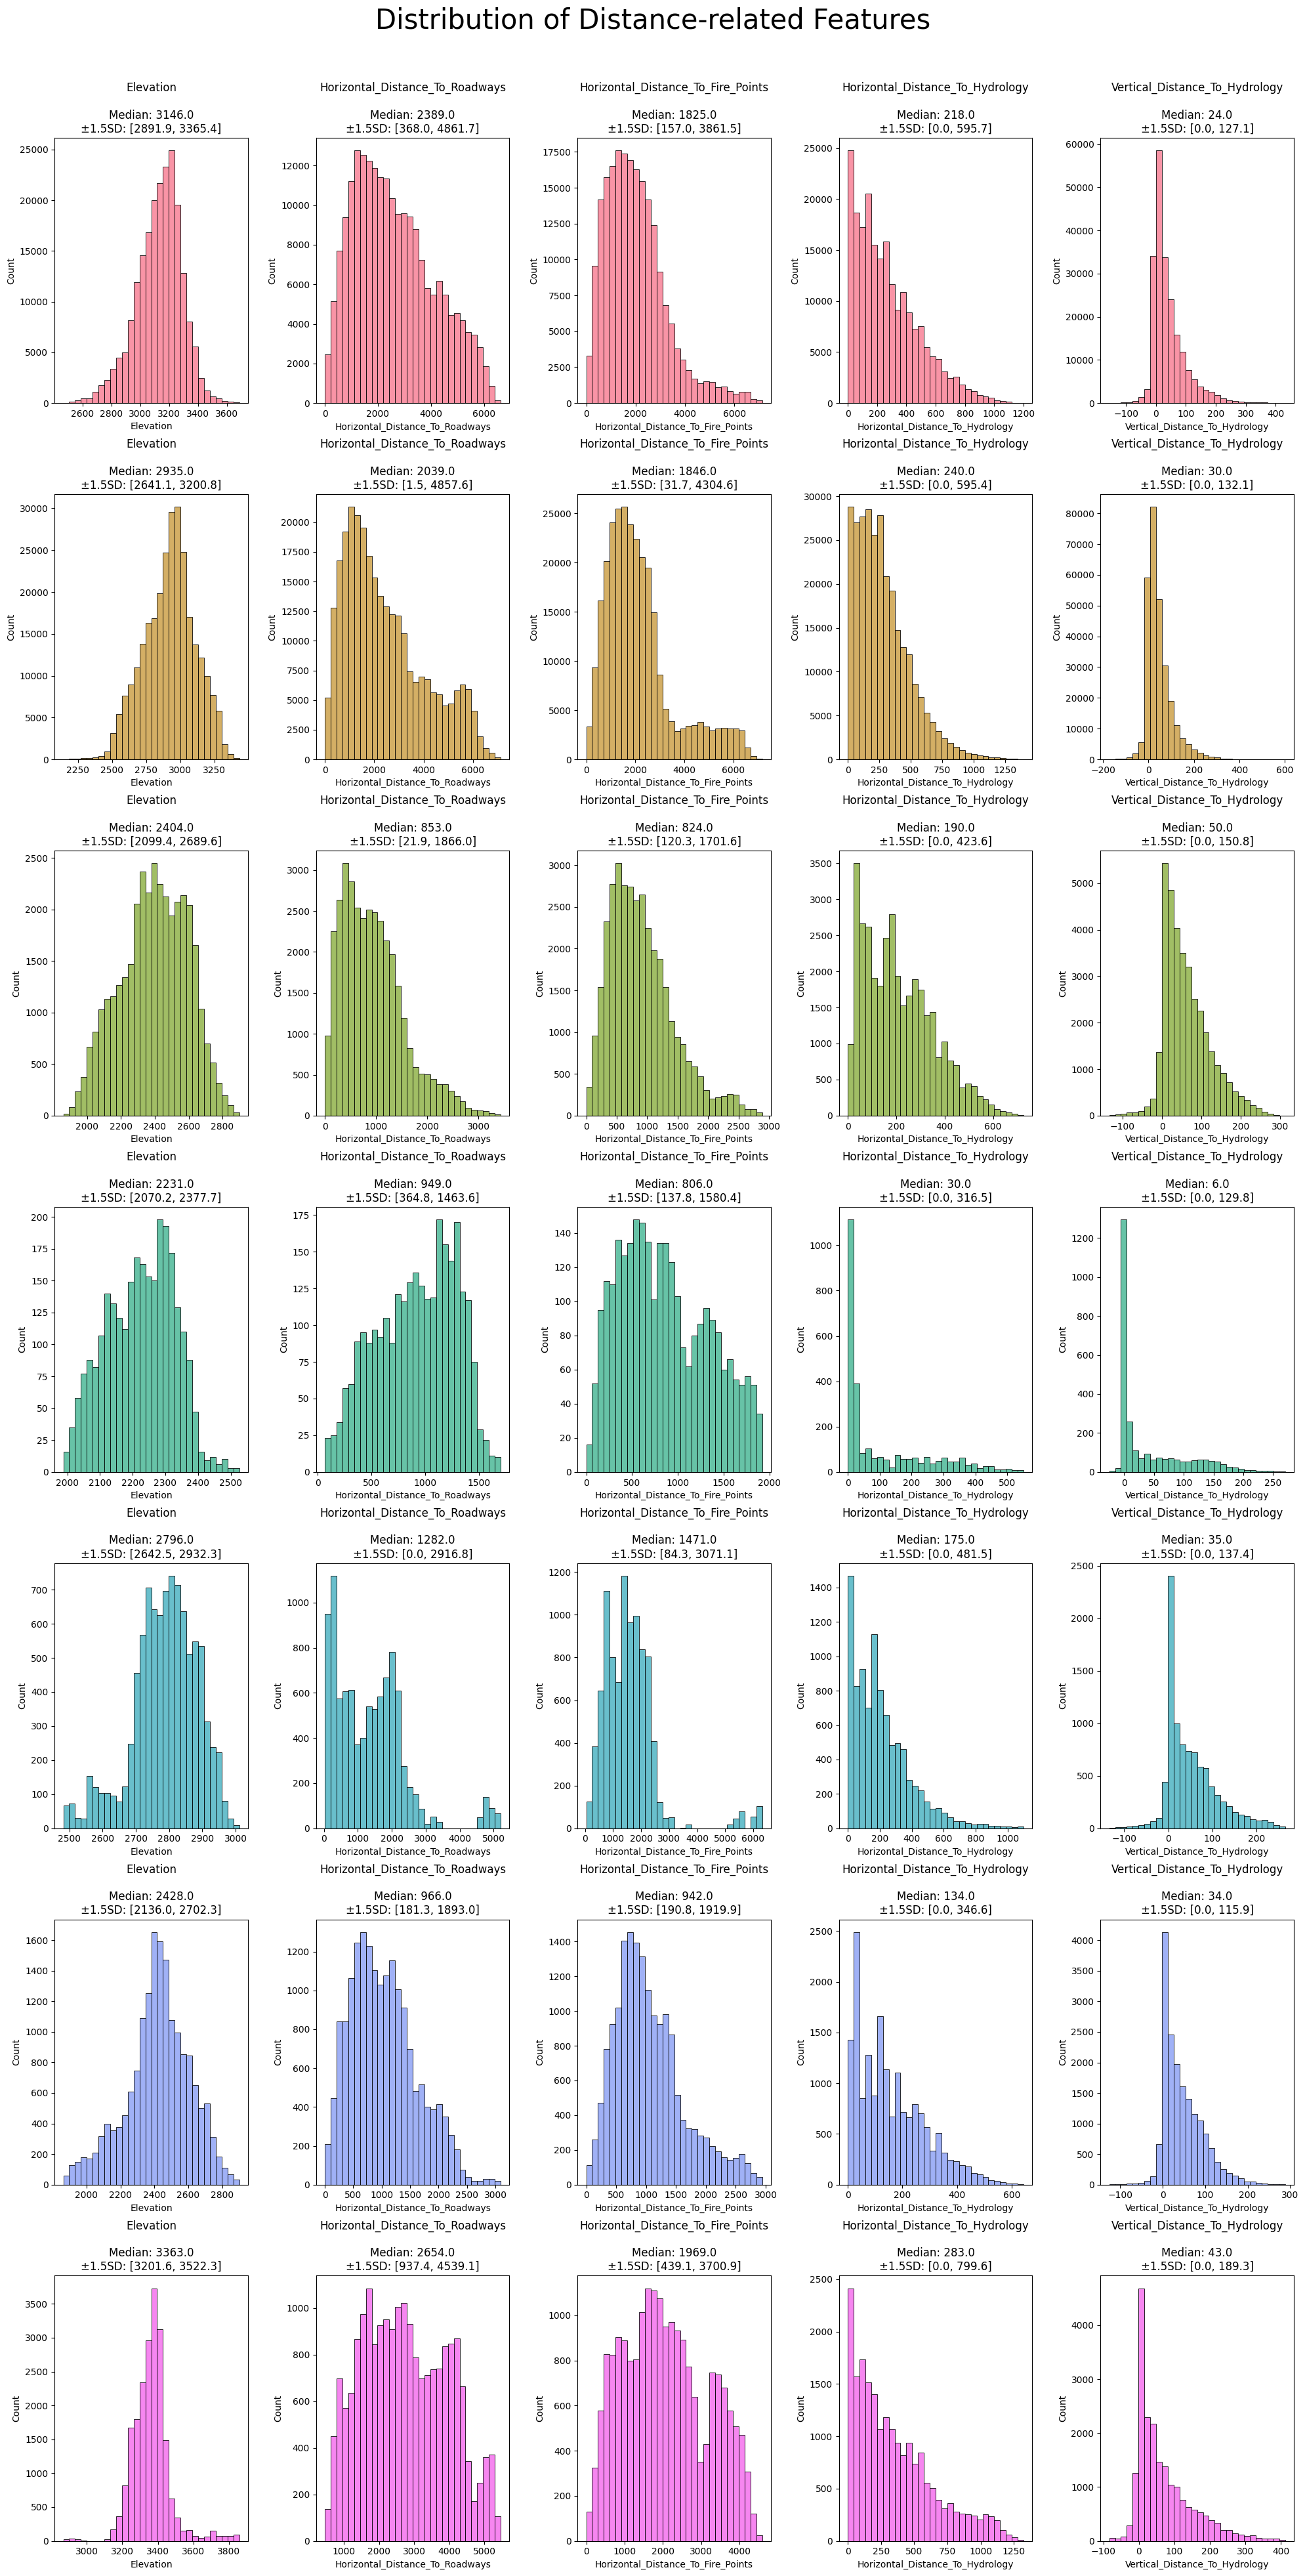

In [110]:
# create subplot space
fig, axes = plt.subplots(7, 5, figsize=(20, 40))
fig.suptitle('Distribution of Distance-related Features', fontsize=30)

distance = ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
                'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']

for type in range(7):

        for i, feature in enumerate(distance):
                
                row = type
                col = i
                data_covertype=df[df['Cover_Type'] == type+1]
                sns.histplot(data = data_covertype, x=feature, bins=30, ax=axes[row, col], color=colors[type]) # ax = array. 1D arrays initialized with only columns
                axes[row, col].set_title(f'{feature}')

                # Calculate statistics for the specific feature column
                feature_data = data_covertype[feature]
                mean_val = feature_data.mean()
                median_val = feature_data.median()
                std_val = feature_data.std()
                
                # Calculate 1 and 2 standard deviations from mean
                sd1_lower = mean_val - std_val*1.5
                sd1_upper = mean_val + std_val*1.5

                if sd1_lower < 0:  # Ensure lower bounds are not negative
                        sd1_lower = 0
                
                # Add statistics to title
                axes[row, col].set_title(f'{feature}\n\nMedian: {median_val:.1f}\n±1.5SD: [{sd1_lower:.1f}, {sd1_upper:.1f}]')

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # make room for suptitle
plt.show()


### Wilderness Area Feature Distributions

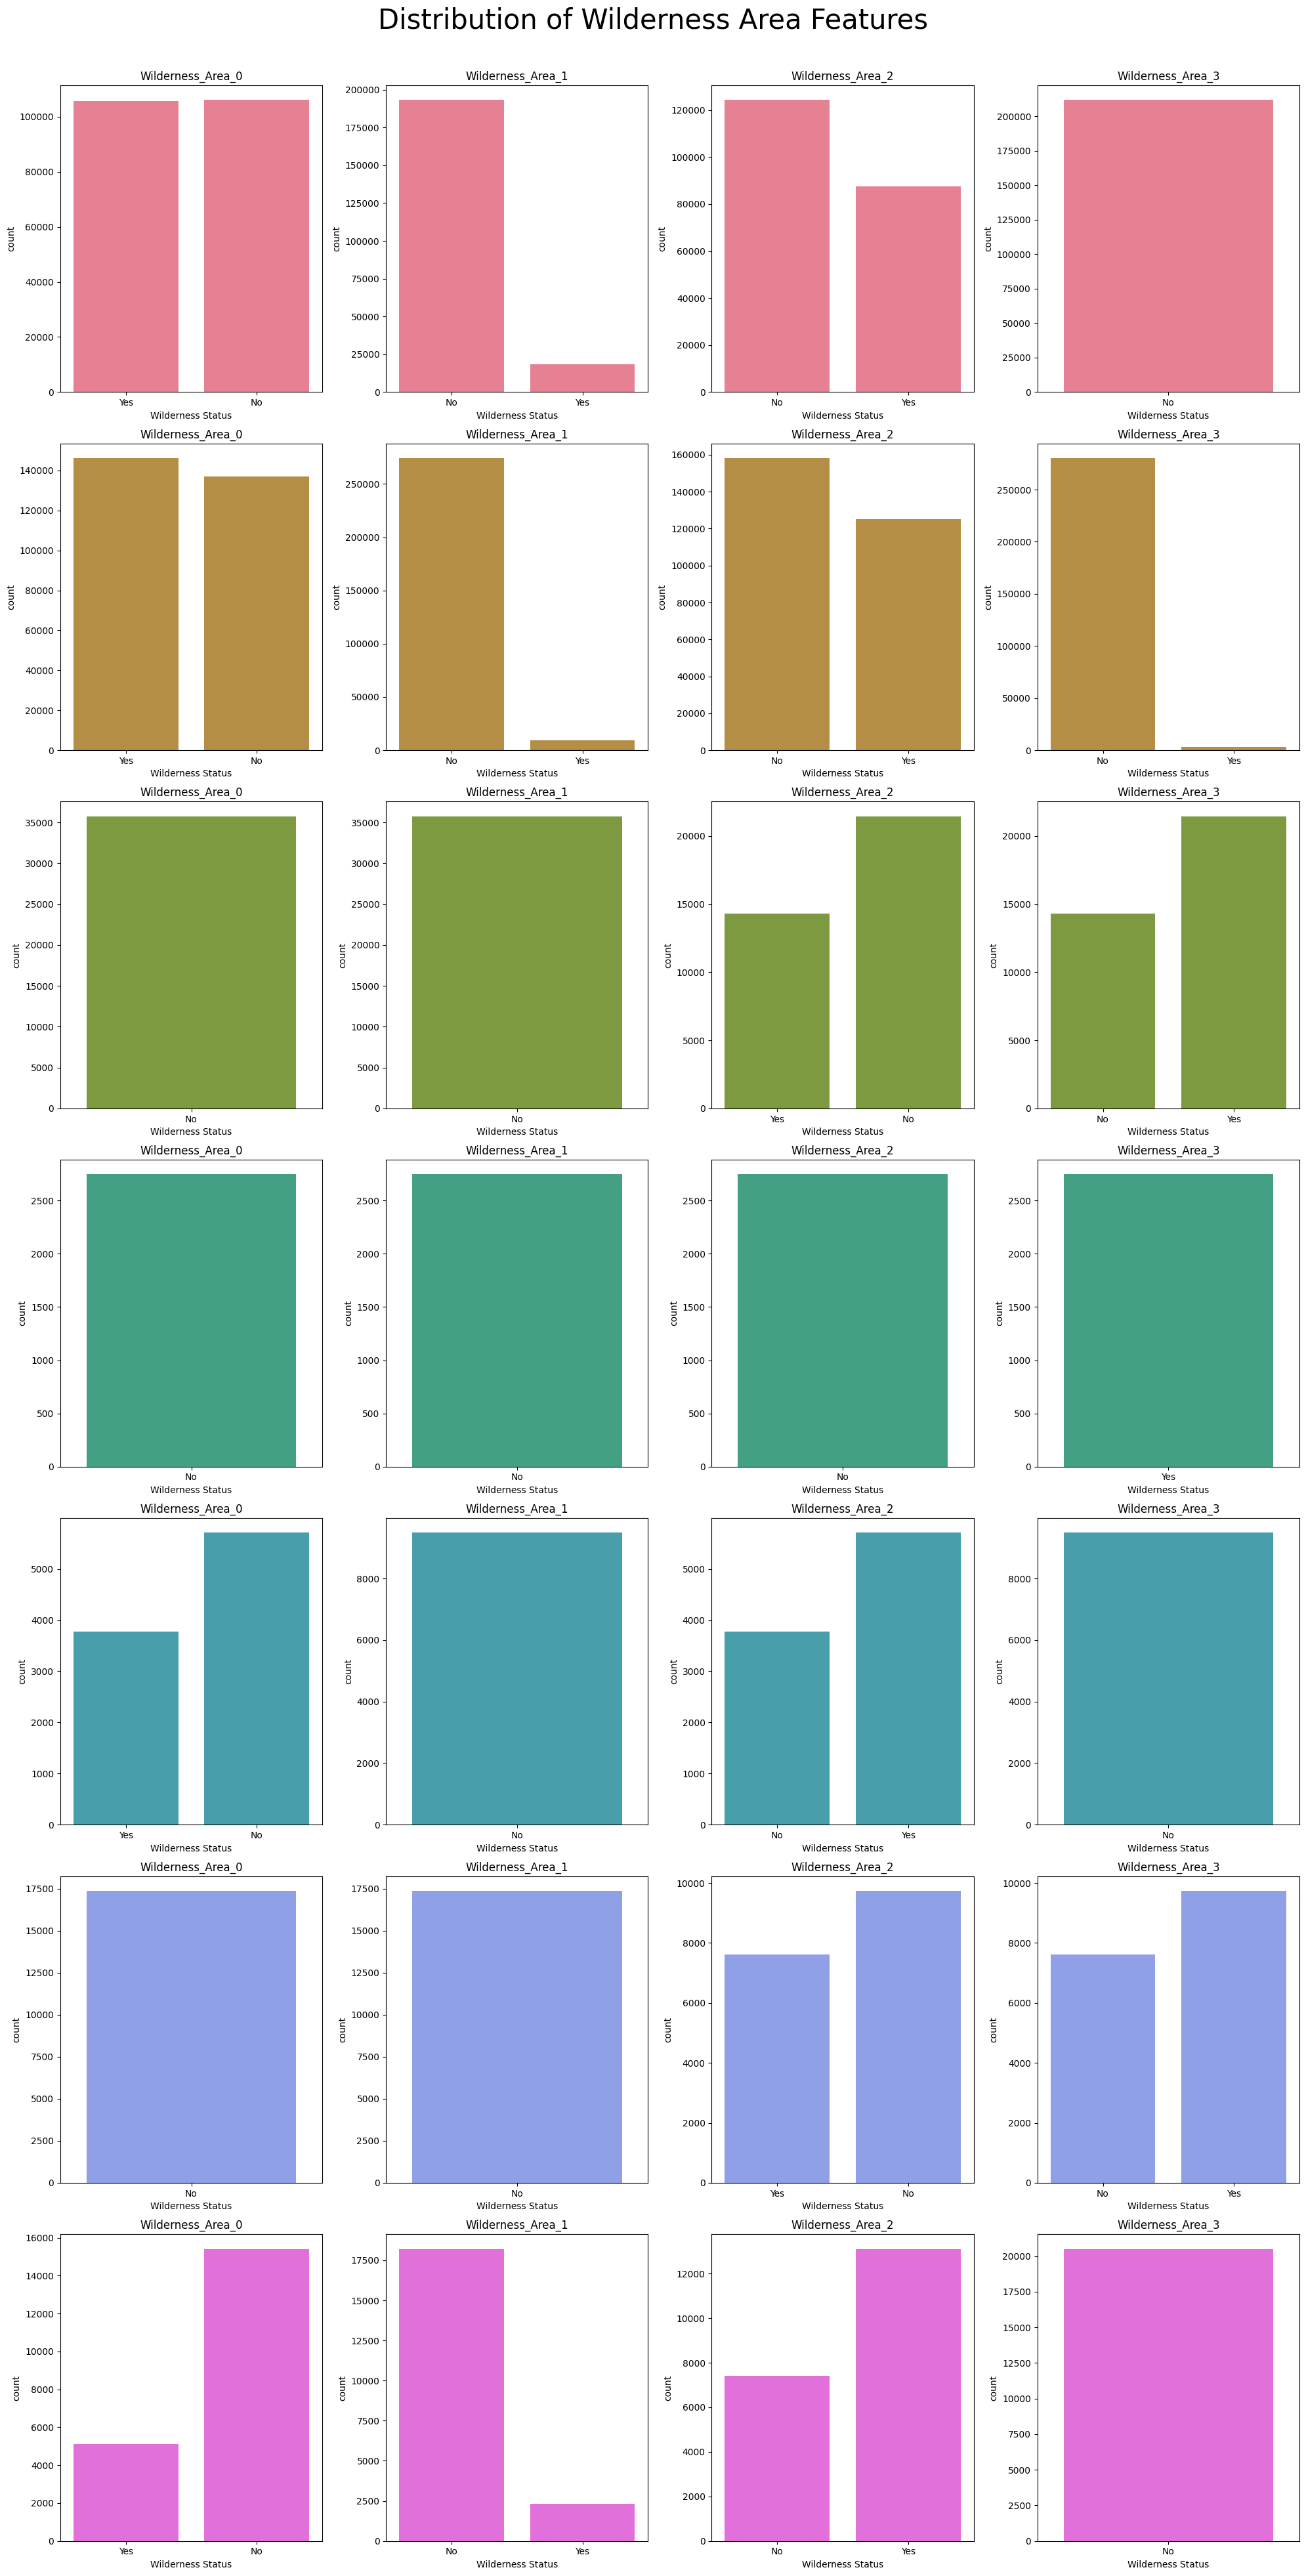

In [ ]:
fig, axes = plt.subplots(7, 4, figsize=(20, 40))
fig.suptitle('Distribution of Wilderness Area Features', fontsize=30)
wilderness_features = ['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3']

# dictionary assigning representative labels for categorical values
categorical_map = {
        
        'binary': {0: 'No', 1: 'Yes'}
        
        }

for type in range(7):

        for i, feature in enumerate(wilderness_features):

                row = type
                col = i

                data = df[df['Cover_Type'] == type+1] # section off each class type
                renamed_data = data[feature].map(categorical_map['binary'])  # Map binary values to 'No'/'Yes' in each class type
                
                sns.countplot(x=renamed_data, ax=axes[row, col], color=colors[type]) # uses renamed_data as data, ax = array. 1D arrays initialized with only columns
                axes[row, col].set_title(f'{feature}')
                axes[row, col].set_xlabel("Wilderness Status")  # Set tick positions first

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # make room for suptitle
plt.show()


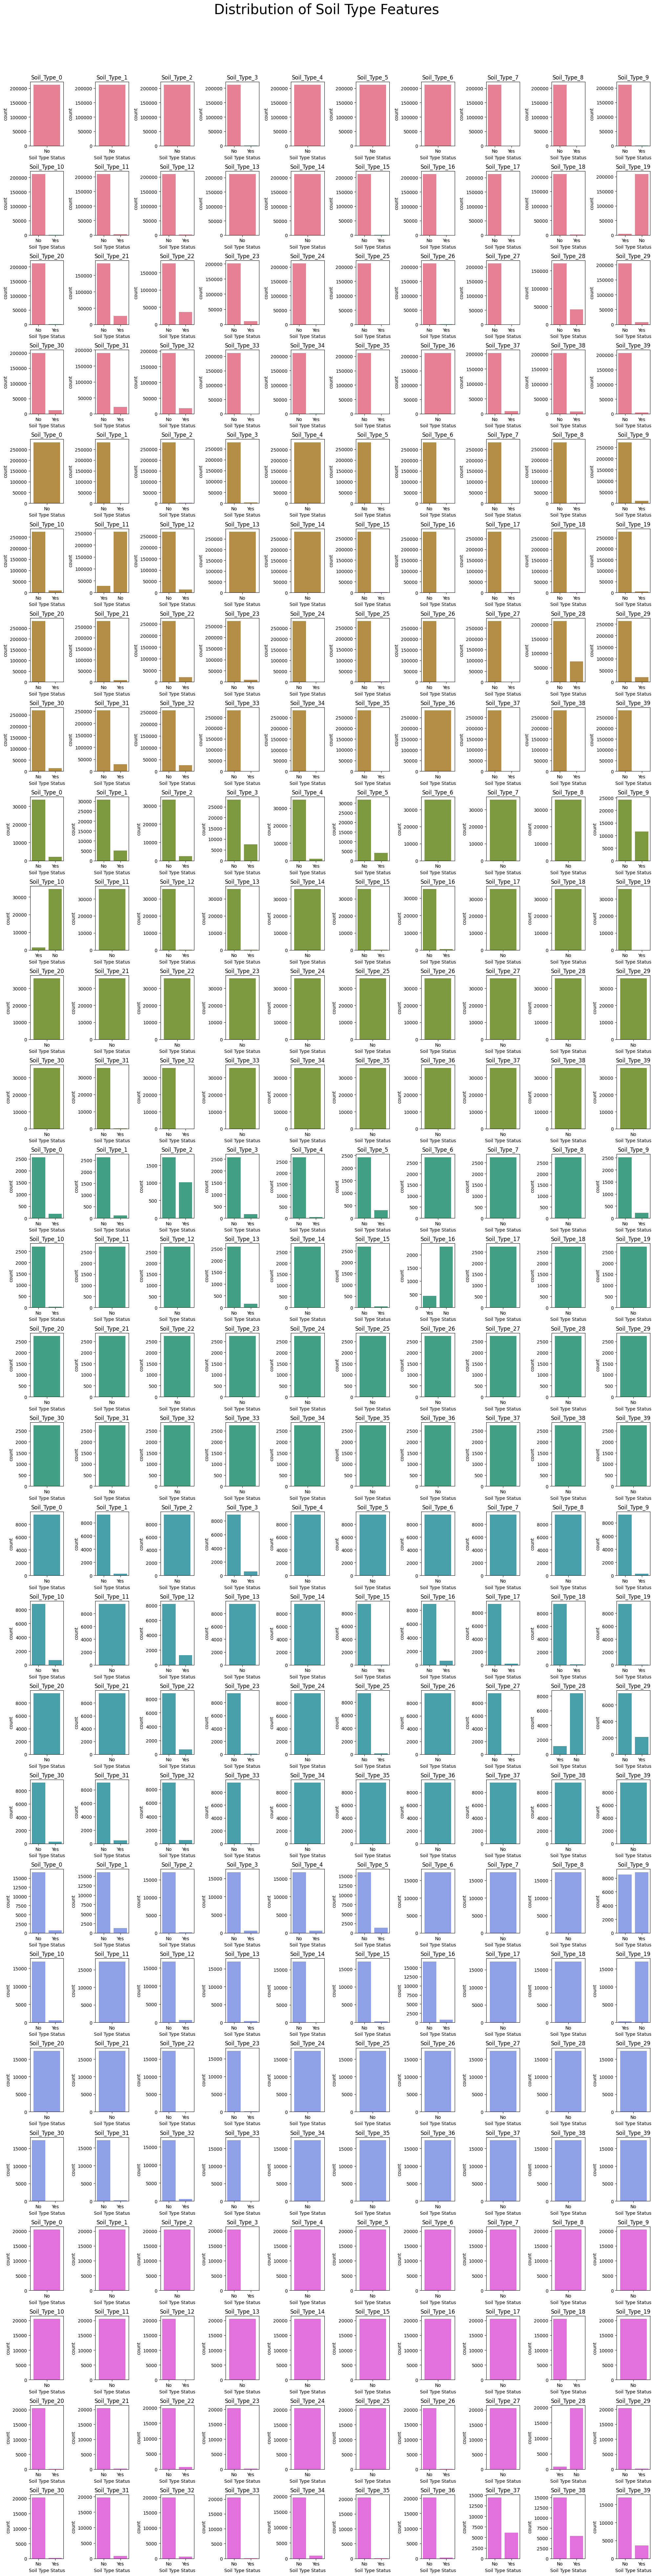

In [89]:
fig, axes = plt.subplots(28, 10, figsize=(20, 80))  # 8 rows and 5 columns for soil type features
fig.suptitle('Distribution of Soil Type Features', fontsize=30)

soil_features = df.columns[14:54]  # list fo soil type features, grabbed from df features from index 14 to 54

for type in range(7):  # for each class type

        for i, feature in enumerate(soil_features):
                row = (i + type * 40) // 10   # Calculate row position
                col = i % 10  # Calculate column position

                data = df[df['Cover_Type'] == type+1]
                renamed_data = data[feature].map(categorical_map['binary'])
                sns.countplot(x=renamed_data, ax=axes[row, col], color=colors[type]) # uses renamed_data as data, ax = array. 1D arrays initialized with only columns
                
                axes[row, col].set_title(f'{feature}')
                axes[row, col].set_xlabel("Soil Type Status")  # Set tick positions first

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # make room for suptitle
plt.show()


In [91]:
cover_type_percentages = df['Cover_Type'].value_counts(normalize=True) * 100
print(cover_type_percentages)


Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: proportion, dtype: float64
